In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy import stats
import datetime as dt
import random as rnd
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.plotting import ColumnDataSource,output_notebook
from bokeh.models import HoverTool
import math
from scipy.spatial.distance import euclidean

In [4]:
n_of_customers=int(input('The number of customers : '))
n_of_couriers=int(input('The number of couriers : '))
n_of_warehouses=int(input('The number of warehouses : '))
average_order_waiting_limit=int(input('Average Order waiting limit (in min) : '))*60

order_prob=0.000005
order_queue=pd.DataFrame({"Customers_in_queue":[]})

def queue_order_adding(data):
        order_queue=order_queue.append(pd.DataFrame({"Customers_in_queue":data}),ignore_index = True)

def calculateDistance(x1,y1,x2,y2):               #Calculates the hypotenuse distance of two points
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist
def Control_orders(objects,time):  #takes the exact time and calculate whether that customer give order at that time.
    customer_ids_gave_order=[]
    for i in range(n_of_customers):
        if objects[i].order_time_hist != []:
            if objects[i].order_time_hist[-1] == time :
                customer_ids_gave_order.append(objects[i].cust_id)
            
    return customer_ids_gave_order

def Courier_to_deliver(objects):
    pass

def available_couriers(cour_objects):
    available_ones=[]
    for cour in range(n_of_couriers):
        if(cour_objects[cour].availability == 1):
            available_ones.append(cour_objects[cour].cour_id)
    return available_ones

def nearest_warehouse(my_x,my_y):
    pt=[]
    best_dist=9999999
    for num in range(n_of_warehouses):
        hypotenuse_distance=calculateDistance(warehouse_objects[num].location_x,warehouse_objects[num].location_y,my_x,my_y)
        if hypotenuse_distance< best_dist:
            best_dist= hypotenuse_distance
            pt=num
    return num


def order_served_time(order_placement,order_received):
    return (order_received-order_placement)
    

    
def finding_the_best_courier(custom,ava_cour):
    total_times_per_courier=[[0 for i in range(2)] for j in range(len(ava_cour))]
    
    for cours in range(len(ava_cour)):
        total_times_per_warehouses=[]
        for whs in range(n_of_warehouses):
            taking_from_wh=calculateDistance(warehouse_objects[whs].location_x,warehouse_objects[whs].location_y,courier_objects[ava_cour[cours]].location_x,courier_objects[ava_cour[cours]].location_y)
            delivery=calculateDistance(warehouse_objects[whs].location_x,warehouse_objects[whs].location_y,custom.location_x,custom.location_y)
            total_times_per_warehouses.append(taking_from_wh+delivery)
        total_times_per_courier[cours]=(min(total_times_per_warehouses)),total_times_per_warehouses.index(min(total_times_per_warehouses))
    total_times_per_courier=pd.DataFrame(total_times_per_courier)
    cour_ind=rnd.choice(np.where(total_times_per_courier[0] == np.array(total_times_per_courier[0]).min())[0])
    best_warehouse=total_times_per_courier[1][cour_ind]
    return cour_ind,best_warehouse
    
       
def points_distance(point,other_points):
    return [ euclidean(point,other_points[j]) for j in range(len(other_points)) ]

def maximum_distance(list_df):
    ds_max = max(list_df)
    idx = list_df.index(ds_max)
    return pts[idx]
    
        


class Warehouses:
    def __init__(self,wh_id):
        self.wh_id=wh_id
        self.location_x=0
        self.location_y=0
    
class Customers:
    def __init__(self,cust_id):
        self.cust_id=cust_id
        self.location_x=rnd.randint(-10000, 10000)
        self.location_y=rnd.randint(-10000, 10000)
        self.order_situation=0
        self.order_waiting_time=np.random.normal(average_order_waiting_limit, 100, 1)[0]
        self.order_time_hist=[]
        self.order_arrival_time=[]
        self.Rating=[]
        
        
    def give_order(self,time):
        if (rnd.random()<=order_prob) & (self.order_situation == 0) : #One can not give the second order 
            self.order_situation = 1                                  # before the last order is satisfied.
            self.order_time_hist.append(time)
            print('Customer {} gave order'.format(self.cust_id))
            
    def give_rating(Self,order_time,arrival_time):
        if(arrival_time-order_time<=self.order_waiting_time):
            rating=10-(10*((arrival_time-order_time)/self.order_waiting_time))+2
            self.Rating.append(rating)
        else:
            self.Rating.append(0)
        pass
    
class Couriers:
    def __init__(self,cour_id):
        self.cour_id=cour_id
        if(rnd.random()<0.2):
            self.vehicle_type ='car'
            self.capacity = 15
        else:
            self.vehicle_type = 'motorbike'
            self.capacity = 3
            
        self.speed = np.random.normal(0.5, 0.05, 1)[0]
        self.order_time_history=[]            #recording the order taken seconds.
        self.arrival_time=None                #the time between order accepting and warehouse arrival
        self.order_distribution_time=None     #the time between package taken and customer distribution
        self.order_taken_time=None            #the time a courier accepts the order.
        self.choosed_customer=None            #the customer for ordering
        self.choosed_warehouse=None           #the warehouse that supplies the ordered product for a courier.
        self.connected_warehouse=None         
        self.location_x =0.0
        self.location_y =0.0
        self.order_serving_time=[]
        self.availability=1                   #if courier is assigned an order availability is 0, else 1.
    
    def find_distance_time(self,your_x,your_y):
        return int(calculateDistance(self.location_x,self.location_y,your_x,your_y) / (14*2*self.speed))


    

    
customer_objects=[]
courier_objects=[]
warehouse_objects=[]


for ids in range(n_of_customers):
    customer_objects.append(Customers(ids))
for ids in range(n_of_warehouses):
    warehouse_objects.append(Warehouses(ids))
for ids in range(n_of_couriers):
    courier_objects.append(Couriers(ids))
    
    
if (n_of_warehouses > 1):
    N=50
    K=n_of_warehouses
    farthest_pts=[0]*K
    x=[ np.random.randint(-8000,8000) for p in range(N)]
    y=[ np.random.randint(-8000,8000) for p in range(N)]
    
    pts = [ [x[i],y[i]] for i in range(N)]
    P0 = pts[np.random.randint(0,N)]
    farthest_pts[0]=P0
    ds_tmp = points_distance(P0,pts)
    
    for i in range(1,K):
        farthest_pts[i] = maximum_distance(ds_tmp)
        ds_tmp2 = points_distance(farthest_pts[i],pts)
        ds_tmp = [ min(ds_tmp[j],ds_tmp2[j]) for j in range(len(ds_tmp))]
        
    for i in range(n_of_warehouses):
        warehouse_objects[i].location_x=farthest_pts[i][0]
        warehouse_objects[i].location_y=farthest_pts[i][1]

for l in range(n_of_couriers):   #Distributes all couriers to warehouses equally.
    k=l%n_of_warehouses
    courier_objects[l].location_x = warehouse_objects[k].location_x
    courier_objects[l].location_y = warehouse_objects[k].location_y  
    courier_objects[l].connected_warehouse=k

    

The number of customers : 2000
The number of couriers : 15
The number of warehouses : 4
Average Order waiting limit (in min) : 20


In [5]:
for second in range(61200):
    for j in range(n_of_customers):  # In every second customers give orders or not.
        customer_objects[j].give_order(second)
    x=Control_orders(customer_objects,second)
    if(x != []):
        order_queue=order_queue.append(pd.DataFrame({"Customers_in_queue":x}),ignore_index = True)
    for j in range(n_of_couriers):
        if(courier_objects[j].arrival_time == second):
            cust=courier_objects[j].choosed_customer
            courier_objects[j].arrival_time = None
            courier_objects[j].order_distribution_time = second + 60 + courier_objects[j].find_distance_time(customer_objects[cust].location_x,customer_objects[cust].location_y)
            courier_objects[j].location_x=warehouse_objects[courier_objects[j].choosed_warehouse].location_x
            courier_objects[j].location_y=warehouse_objects[courier_objects[j].choosed_warehouse].location_y
            print('Courier {} came to the warehouse {} to take the product and it is on the way'.format(courier_objects[j].cour_id,warehouse_objects[courier_objects[j].choosed_warehouse].wh_id))
        if(courier_objects[j].order_distribution_time == second):
            cust=courier_objects[j].choosed_customer
            courier_objects[j].location_x=customer_objects[cust].location_x
            courier_objects[j].location_y=customer_objects[cust].location_y
            customer_objects[cust].order_arrival_time.append(courier_objects[j].order_distribution_time)
            courier_objects[j].order_serving_time.append(order_served_time(customer_objects[cust].order_time_hist[-1],courier_objects[j].order_distribution_time))
            courier_objects[j].order_distribution_time = None
            customer_objects[cust].order_situation=0
            courier_objects[j].availability = 1
            print('Courier {} delivered the order to the customer {}'.format(courier_objects[j].cour_id,customer_objects[cust].cust_id))
            
    
    couriers_available = available_couriers(courier_objects)
    
    
    if(list(order_queue['Customers_in_queue']) != []):
        if(couriers_available != []):
            aim_courier,aim_warehouse=finding_the_best_courier(customer_objects[int(order_queue.values[0][0])],couriers_available)
            assigned_courier=couriers_available[aim_courier]
            courier_objects[assigned_courier].choosed_warehouse=aim_warehouse
            courier_objects[assigned_courier].choosed_customer=int(order_queue.values[0][0])
            courier_objects[assigned_courier].availability=0
            courier_objects[assigned_courier].arrival_time=second +5+ courier_objects[assigned_courier].find_distance_time(warehouse_objects[aim_warehouse].location_x,warehouse_objects[aim_warehouse].location_y)
            print('Order of customer {} is assigned to the courier {}'.format(int(order_queue.values[0][0]),courier_objects[assigned_courier].cour_id))
            order_queue=order_queue[1:]
        

Customer 252 gave order
Order of customer 252 is assigned to the courier 10
Courier 10 came to the warehouse 2 to take the product and it is on the way
Customer 822 gave order
Order of customer 822 is assigned to the courier 4
Courier 4 came to the warehouse 0 to take the product and it is on the way
Customer 1534 gave order
Order of customer 1534 is assigned to the courier 8
Courier 8 came to the warehouse 0 to take the product and it is on the way
Customer 1477 gave order
Order of customer 1477 is assigned to the courier 12
Courier 12 came to the warehouse 0 to take the product and it is on the way
Courier 4 delivered the order to the customer 822
Courier 10 delivered the order to the customer 252
Courier 8 delivered the order to the customer 1534
Customer 182 gave order
Order of customer 182 is assigned to the courier 0
Courier 0 came to the warehouse 0 to take the product and it is on the way
Courier 12 delivered the order to the customer 1477
Customer 198 gave order
Order of custo

Courier 11 delivered the order to the customer 616
Courier 9 delivered the order to the customer 1378
Courier 3 came to the warehouse 3 to take the product and it is on the way
Courier 12 came to the warehouse 3 to take the product and it is on the way
Courier 14 came to the warehouse 3 to take the product and it is on the way
Courier 10 came to the warehouse 3 to take the product and it is on the way
Courier 0 delivered the order to the customer 733
Courier 2 delivered the order to the customer 1721
Courier 3 delivered the order to the customer 1063
Customer 454 gave order
Order of customer 454 is assigned to the courier 11
Courier 12 delivered the order to the customer 1464
Courier 11 came to the warehouse 3 to take the product and it is on the way
Customer 677 gave order
Order of customer 677 is assigned to the courier 3
Customer 192 gave order
Order of customer 192 is assigned to the courier 1
Courier 14 delivered the order to the customer 601
Customer 1163 gave order
Order of cust

Customer 1845 gave order
Order of customer 1845 is assigned to the courier 6
Courier 5 came to the warehouse 3 to take the product and it is on the way
Courier 1 came to the warehouse 1 to take the product and it is on the way
Courier 0 came to the warehouse 3 to take the product and it is on the way
Courier 10 delivered the order to the customer 1540
Courier 4 delivered the order to the customer 403
Customer 728 gave order
Order of customer 728 is assigned to the courier 9
Courier 7 delivered the order to the customer 1308
Courier 5 delivered the order to the customer 1022
Customer 649 gave order
Order of customer 649 is assigned to the courier 5
Courier 6 came to the warehouse 2 to take the product and it is on the way
Courier 13 delivered the order to the customer 607
Courier 11 came to the warehouse 0 to take the product and it is on the way
Courier 14 came to the warehouse 3 to take the product and it is on the way
Courier 5 came to the warehouse 3 to take the product and it is on

Customer 1241 gave order
Order of customer 1241 is assigned to the courier 5
Courier 3 came to the warehouse 3 to take the product and it is on the way
Courier 13 came to the warehouse 3 to take the product and it is on the way
Courier 1 delivered the order to the customer 242
Courier 10 delivered the order to the customer 1917
Courier 12 came to the warehouse 0 to take the product and it is on the way
Courier 14 delivered the order to the customer 1542
Courier 5 came to the warehouse 3 to take the product and it is on the way
Customer 191 gave order
Order of customer 191 is assigned to the courier 4
Courier 0 delivered the order to the customer 551
Customer 1600 gave order
Order of customer 1600 is assigned to the courier 14
Customer 1434 gave order
Order of customer 1434 is assigned to the courier 0
Courier 2 came to the warehouse 1 to take the product and it is on the way
Courier 0 came to the warehouse 3 to take the product and it is on the way
Courier 8 delivered the order to the 

Courier 4 delivered the order to the customer 662
Courier 11 delivered the order to the customer 735
Courier 9 came to the warehouse 2 to take the product and it is on the way
Customer 1282 gave order
Order of customer 1282 is assigned to the courier 7
Courier 8 delivered the order to the customer 1670
Customer 1988 gave order
Order of customer 1988 is assigned to the courier 10
Courier 12 delivered the order to the customer 1536
Courier 1 delivered the order to the customer 480
Courier 13 delivered the order to the customer 1457
Customer 495 gave order
Order of customer 495 is assigned to the courier 0
Courier 5 came to the warehouse 2 to take the product and it is on the way
Courier 2 delivered the order to the customer 787
Courier 9 delivered the order to the customer 1625
Customer 123 gave order
Order of customer 123 is assigned to the courier 4
Courier 7 came to the warehouse 1 to take the product and it is on the way
Courier 6 delivered the order to the customer 199
Customer 588 

Customer 1834 gave order
Order of customer 1834 is assigned to the courier 9
Courier 11 came to the warehouse 1 to take the product and it is on the way
Courier 2 came to the warehouse 2 to take the product and it is on the way
Courier 7 delivered the order to the customer 1623
Customer 1169 gave order
Order of customer 1169 is assigned to the courier 6
Courier 0 delivered the order to the customer 18
Courier 4 came to the warehouse 1 to take the product and it is on the way
Courier 13 came to the warehouse 3 to take the product and it is on the way
Customer 482 gave order
Order of customer 482 is assigned to the courier 0
Courier 12 came to the warehouse 1 to take the product and it is on the way
Customer 1599 gave order
Courier 5 delivered the order to the customer 688
Order of customer 1599 is assigned to the courier 10
Customer 674 gave order
Order of customer 674 is assigned to the courier 7
Courier 9 came to the warehouse 1 to take the product and it is on the way
Courier 11 deli

Customer 1443 gave order
Order of customer 1443 is assigned to the courier 13
Customer 1300 gave order
Order of customer 1300 is assigned to the courier 3
Courier 0 delivered the order to the customer 299
Courier 4 delivered the order to the customer 570
Courier 8 delivered the order to the customer 1564
Customer 496 gave order
Order of customer 496 is assigned to the courier 8
Customer 1955 gave order
Order of customer 1955 is assigned to the courier 0
Courier 9 delivered the order to the customer 1179
Courier 2 came to the warehouse 2 to take the product and it is on the way
Customer 1287 gave order
Order of customer 1287 is assigned to the courier 4
Courier 12 delivered the order to the customer 1483
Courier 7 came to the warehouse 1 to take the product and it is on the way
Customer 1367 gave order
Order of customer 1367 is assigned to the courier 14
Courier 13 came to the warehouse 3 to take the product and it is on the way
Customer 329 gave order
Order of customer 329 is assigned 

Courier 14 delivered the order to the customer 453
Order of customer 670 is assigned to the courier 14
Courier 3 came to the warehouse 0 to take the product and it is on the way
Courier 5 came to the warehouse 2 to take the product and it is on the way
Courier 4 delivered the order to the customer 1345
Courier 6 delivered the order to the customer 1316
Courier 10 came to the warehouse 3 to take the product and it is on the way
Customer 1729 gave order
Order of customer 1729 is assigned to the courier 6
Customer 342 gave order
Order of customer 342 is assigned to the courier 4
Courier 12 delivered the order to the customer 1584
Courier 2 came to the warehouse 3 to take the product and it is on the way
Customer 849 gave order
Order of customer 849 is assigned to the courier 12
Courier 14 came to the warehouse 1 to take the product and it is on the way
Courier 8 came to the warehouse 3 to take the product and it is on the way
Courier 11 delivered the order to the customer 899
Courier 7 ca

Courier 14 delivered the order to the customer 1461
Order of customer 856 is assigned to the courier 14
Courier 3 came to the warehouse 1 to take the product and it is on the way
Customer 914 gave order
Courier 8 delivered the order to the customer 1194
Order of customer 102 is assigned to the courier 8
Courier 6 delivered the order to the customer 1842
Order of customer 218 is assigned to the courier 6
Courier 9 delivered the order to the customer 998
Order of customer 1585 is assigned to the courier 9
Courier 5 came to the warehouse 3 to take the product and it is on the way
Courier 7 came to the warehouse 3 to take the product and it is on the way
Customer 687 gave order
Courier 11 delivered the order to the customer 925
Order of customer 643 is assigned to the courier 11
Customer 335 gave order
Courier 10 delivered the order to the customer 638
Order of customer 914 is assigned to the courier 10
Courier 2 came to the warehouse 3 to take the product and it is on the way
Courier 12 c

Courier 13 came to the warehouse 3 to take the product and it is on the way
Courier 0 came to the warehouse 2 to take the product and it is on the way
Customer 1795 gave order
Courier 3 came to the warehouse 3 to take the product and it is on the way
Courier 4 delivered the order to the customer 893
Order of customer 135 is assigned to the courier 4
Customer 831 gave order
Courier 10 delivered the order to the customer 1496
Order of customer 1719 is assigned to the courier 10
Courier 14 delivered the order to the customer 918
Order of customer 1943 is assigned to the courier 14
Customer 1876 gave order
Courier 11 came to the warehouse 2 to take the product and it is on the way
Courier 9 came to the warehouse 3 to take the product and it is on the way
Courier 4 came to the warehouse 1 to take the product and it is on the way
Courier 14 came to the warehouse 0 to take the product and it is on the way
Courier 7 delivered the order to the customer 1415
Order of customer 327 is assigned to 

Customer 1873 gave order
Order of customer 1873 is assigned to the courier 5
Courier 11 came to the warehouse 1 to take the product and it is on the way
Courier 10 came to the warehouse 1 to take the product and it is on the way
Courier 3 came to the warehouse 2 to take the product and it is on the way
Customer 121 gave order
Order of customer 121 is assigned to the courier 9
Courier 2 came to the warehouse 3 to take the product and it is on the way
Courier 0 delivered the order to the customer 897
Courier 4 delivered the order to the customer 198
Courier 10 delivered the order to the customer 1067
Courier 13 delivered the order to the customer 974
Courier 1 came to the warehouse 3 to take the product and it is on the way
Customer 504 gave order
Order of customer 504 is assigned to the courier 13
Courier 12 delivered the order to the customer 32
Courier 5 came to the warehouse 2 to take the product and it is on the way
Courier 9 came to the warehouse 1 to take the product and it is on 

Courier 1 delivered the order to the customer 824
Courier 8 delivered the order to the customer 445
Courier 2 delivered the order to the customer 1701
Courier 11 came to the warehouse 2 to take the product and it is on the way
Customer 1189 gave order
Order of customer 1189 is assigned to the courier 8
Customer 1896 gave order
Order of customer 1896 is assigned to the courier 5
Courier 14 delivered the order to the customer 1843
Customer 966 gave order
Order of customer 966 is assigned to the courier 0
Courier 10 delivered the order to the customer 1286
Courier 7 came to the warehouse 1 to take the product and it is on the way
Courier 12 delivered the order to the customer 139
Customer 1441 gave order
Order of customer 1441 is assigned to the courier 3
Customer 722 gave order
Order of customer 722 is assigned to the courier 10
Courier 5 came to the warehouse 2 to take the product and it is on the way
Customer 682 gave order
Order of customer 682 is assigned to the courier 2
Courier 8 c

Order of customer 1712 is assigned to the courier 12
Courier 11 delivered the order to the customer 948
Courier 0 came to the warehouse 2 to take the product and it is on the way
Customer 319 gave order
Order of customer 319 is assigned to the courier 3
Customer 421 gave order
Order of customer 421 is assigned to the courier 9
Customer 770 gave order
Courier 8 delivered the order to the customer 143
Order of customer 770 is assigned to the courier 14
Courier 2 came to the warehouse 2 to take the product and it is on the way
Courier 12 came to the warehouse 0 to take the product and it is on the way
Courier 9 came to the warehouse 3 to take the product and it is on the way
Customer 1826 gave order
Order of customer 1826 is assigned to the courier 1
Courier 7 delivered the order to the customer 1360
Courier 10 came to the warehouse 3 to take the product and it is on the way
Courier 13 came to the warehouse 0 to take the product and it is on the way
Courier 3 came to the warehouse 2 to ta

Courier 8 came to the warehouse 1 to take the product and it is on the way
Customer 804 gave order
Order of customer 804 is assigned to the courier 13
Customer 1449 gave order
Order of customer 1449 is assigned to the courier 12
Courier 11 delivered the order to the customer 555
Customer 69 gave order
Order of customer 69 is assigned to the courier 11
Customer 1611 gave order
Order of customer 1611 is assigned to the courier 3
Courier 6 delivered the order to the customer 306
Courier 13 came to the warehouse 2 to take the product and it is on the way
Courier 12 came to the warehouse 0 to take the product and it is on the way
Customer 967 gave order
Order of customer 967 is assigned to the courier 5
Customer 744 gave order
Order of customer 744 is assigned to the courier 1
Courier 3 came to the warehouse 0 to take the product and it is on the way
Customer 181 gave order
Courier 8 delivered the order to the customer 1804
Order of customer 181 is assigned to the courier 2
Customer 1319 ga

Courier 3 delivered the order to the customer 220
Customer 1031 gave order
Order of customer 1031 is assigned to the courier 6
Customer 1310 gave order
Order of customer 1310 is assigned to the courier 3
Courier 13 came to the warehouse 1 to take the product and it is on the way
Courier 11 came to the warehouse 2 to take the product and it is on the way
Courier 10 delivered the order to the customer 110
Courier 14 came to the warehouse 3 to take the product and it is on the way
Courier 9 delivered the order to the customer 1184
Customer 366 gave order
Order of customer 366 is assigned to the courier 9
Courier 6 came to the warehouse 0 to take the product and it is on the way
Courier 7 delivered the order to the customer 665
Courier 8 delivered the order to the customer 1911
Customer 1394 gave order
Order of customer 1394 is assigned to the courier 0
Courier 12 delivered the order to the customer 1916
Courier 5 came to the warehouse 1 to take the product and it is on the way
Courier 3 c

[46, 34, 40, 39, 42, 50, 40, 39, 37, 39, 33, 41, 34, 41, 39]
Average Order number for couriers is 39.6
--------------------------------------------------------------------------------
[ 235.  633.  684.  515. 1095. 1204.  589.  548.  451.  454.  632. 1158.
  607.  323.  361.  659. 1335.  831.  931. 1408. 1079. 1180. 1010. 1343.
 1289. 2603.  902. 1371. 1545.  691.  718.  929.  850.  874.  808. 1114.
  243.  798. 1076.  646. 1418.  386.  987.  425.  694.  768.  463.  623.
  670.  788. 1008.  747. 1143. 1180.  984.  896. 1197.  468.  999.  539.
 2564. 2268. 2228.  912. 1516. 1223. 1653. 2419. 1320.  886. 1253.  681.
  573. 1039. 1198. 1270.  985. 1082.  866. 1352.  376.  767.  711.  890.
  835. 1053. 1046. 1104.  712. 1217.  590.  659. 1089.  949.  738.  793.
  838.  994. 1446.  989. 1109. 1913. 2268. 2367. 2102. 2842.  671.  800.
  537. 1379.  957. 1472. 1245.  524.  716. 1611.  878.  611.  962.  764.
  341.  696.  691.  889.  838.  963. 1243.  987. 1070.  592.  855.  841.
  634. 1348. 

C:\Users\Sinan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


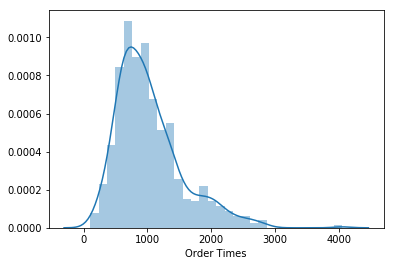

In [9]:
order_number_per_courier=[]
serving_times_per_courier=pd.DataFrame({"Order Times":[]})
for ratio in range(n_of_couriers):
    order_number_per_courier.append(len(courier_objects[ratio].order_serving_time))
    if len(courier_objects[ratio].order_serving_time) != 0:
        serving_times_per_courier=serving_times_per_courier.append(pd.DataFrame({"Order Times":courier_objects[ratio].order_serving_time}),ignore_index = True)
print(order_number_per_courier)
print('Average Order number for couriers is {}'.format(np.mean(order_number_per_courier)))
print('--------------------------------------------------------------------------------')
print(serving_times_per_courier['Order Times'].values)
print('--------------------------------------------------------------------------------')
print('MEAN={}        STD={}'.format(serving_times_per_courier['Order Times'].mean(),serving_times_per_courier['Order Times'].std()))
print('MAX SERVICE TIME ={}'.format(serving_times_per_courier['Order Times'].max()))
sns.distplot(serving_times_per_courier['Order Times'],bins=30)

In [7]:
# 2. Create Figure
p = figure(plot_width = 600, plot_height = 400, title = 'Setup')
cust_x=[]
cust_y=[]
courier_x=[]
courier_y=[]
wh_x=[]
wh_y=[]
for i in customer_objects:
    cust_x.append(i.location_x)
    cust_y.append(i.location_y)
for i in courier_objects:
    courier_x.append(i.location_x)
    courier_y.append(i.location_y)
for i in warehouse_objects:
    wh_x.append(i.location_x)
    wh_y.append(i.location_y)

p.asterisk(wh_x, wh_y, color = 'blue',size=45)
p.circle(courier_x, courier_y, color = 'green', alpha = 0.5, size = 15)
#p.circle(cust_x, cust_y, color = 'red', alpha = 0.5, size = 15)
output_notebook()
show(p)

Loading BokehJS ...

## In this simulation, warehouses are created in distance maximized locations and when an order comes from a customer, the orders are assigned the most nearest courier among the available ones .In addition,if a courier is available in a customer location in where that courier visited for an order purpose,the location of that courier remains stable in that location until an order is assigned to that customer.That is to say,that courier does not go to the nearest warehouse to wait the next order.

### In this simulation which lasts 17 hours,the inputs that I gave are;
    TOTAL CUSTOMERS  = 2000
    TOTAL COURİERS   = 15
    TOTAL WAREHOUSES = 4

### As a result of simulation, we can see that;
    Average order number for couriers is 39.6
    Service mean time is 1031.82 and standart deviation of service times is 524.14